In [42]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [43]:
#Prepare data
X_numpy , y_numpy = datasets.make_regression(n_samples=100, n_features=1,noise=20,random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = X = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0] , 1)
n_samples = X.shape
n_features = X.shape

In [44]:
#Model
input_size = n_features
output_size = 1
model = nn.Linear(100,1)

In [45]:
#loss and optimzer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate) 

In [46]:
#training loops 
num_epochs = 100
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted,y)
    
    #backward pass
    loss.backward()
    #update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1} ,  loss = {loss.item():.4f}')
        

epoch: 10 ,  loss = inf
epoch: 20 ,  loss = nan
epoch: 30 ,  loss = nan
epoch: 40 ,  loss = nan
epoch: 50 ,  loss = nan
epoch: 60 ,  loss = nan
epoch: 70 ,  loss = nan
epoch: 80 ,  loss = nan
epoch: 90 ,  loss = nan
epoch: 100 ,  loss = nan


ValueError: x and y must have same first dimension, but have shapes (100, 1) and (1,)

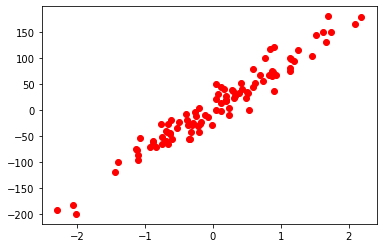

In [47]:
predicted = model(X).detach().numpy()
plt.plot(X_numpy , y_numpy , 'ro')
plt.plot(X_numpy , predicted , 'b')
plt.show()